## 랜덤포레스트

- n_estimator : 트리갯수
- max_feature : 무작위로 선택할 feature 갯수
- max_depth : 트리의 깊이
- min_samples_leaf : 리프노드가 최소 몇개의 데이터를 가져야 하는지

### 분류모델

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import plot_tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rc('font',family='Malgun Gothic')
plt.rcParams["axes.unicode_minus"] = False
import seaborn as sns

In [2]:
cancer = load_breast_cancer()
x_train,x_test,y_train,y_test = train_test_split(cancer.data,
                                                 cancer.target,
                                                random_state=0)
#데이터 수집 및 분할

In [3]:
rf= RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train,y_train)
#랜덤포레스트, 트리개수 100개

RandomForestClassifier(random_state=0)

In [4]:
print("train 세트 정확도 : {:.3f}".format(rf.score(x_train,y_train)))

train 세트 정확도 : 1.000


In [5]:
print("test 세트 정확도 : {:.3f}".format(rf.score(x_test,y_test)))

test 세트 정확도 : 0.972


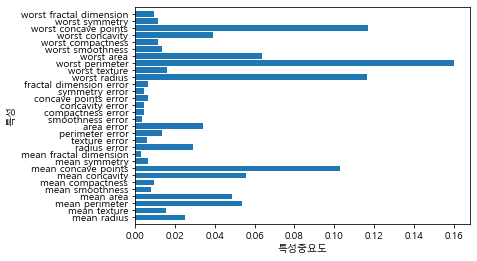

In [6]:
n_features = cancer.data.shape[1]
plt.barh(np.arange(n_features),rf.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel('특성중요도')
plt.ylabel("특성")
plt.ylim(-1,n_features)
plt.show()
#특성중요도를 시각화한 그래프

### 회귀모델

In [7]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [8]:
boston = load_boston()
x_train,x_test,y_train,y_test = train_test_split(boston.data,
                                                 boston.target,
                                                test_size=0.3)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [9]:
rf = RandomForestRegressor(n_estimators = 10, 
                           bootstrap = True,
                          criterion = 'mse',
                          max_features = 'auto')
#모델 선정
#bootstrap = True :중복되는 모델이 있게 설계
#criterion = 평가지표로 ~ 사용

In [10]:
rf.fit(x_train,y_train)
#모델 학습

C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mse', n_estimators=10)

In [11]:
pred = rf.predict(x_test)
pred
#예측값 산출

array([21.53, 19.36, 15.22, 21.84, 17.86, 19.46, 12.09, 21.73, 17.61,
       15.49, 42.4 , 22.81, 19.97, 35.66, 30.13, 33.82, 21.59, 11.  ,
       47.66, 20.02, 20.26, 30.7 , 11.73, 18.33, 42.91, 13.57, 20.82,
       26.71, 20.59, 18.54, 42.73, 20.4 , 20.68, 20.91, 10.17, 14.08,
       18.51, 13.91, 24.18, 34.25, 21.32, 23.33, 47.57, 26.16, 42.29,
       32.48, 20.86, 40.44, 45.99, 16.48, 14.52, 32.99, 22.61, 24.72,
       14.12, 25.19, 45.58, 34.64, 19.72, 19.54, 16.75, 23.33, 24.19,
       20.02, 49.76, 47.43, 32.13, 23.72, 18.77, 13.57, 18.19, 16.88,
       45.99, 24.02, 22.05, 35.22, 24.18, 16.98, 36.16, 25.27, 30.03,
       19.1 , 22.46, 21.51, 12.34, 18.61, 21.79, 21.68, 35.62, 23.54,
       16.77, 46.43, 11.58, 19.73, 12.29, 15.64, 15.8 , 41.06, 20.57,
       19.43, 20.02, 23.81, 28.07, 24.07, 34.96, 39.19,  7.62, 13.64,
       21.9 , 45.39,  9.76, 16.32, 19.97, 36.33, 13.88, 22.22, 20.56,
       20.59, 19.04, 17.86, 21.2 ,  6.51, 18.18, 35.91, 30.75, 13.2 ,
       29.43, 21.23,

In [12]:
rf.score(x_train,y_train)
#회귀모델이므로 model.score의 기준은 r2_score

0.9640792323850909

In [13]:
rf.score(x_test,y_test)
#회귀모델이므로 model.score의 기준은 r2_score

0.9215207683405813